# Baseline CNN Training

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
DATA_DIR = "../data/processed"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
# Normalize pixel values to [0,1]
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = val_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 17498 images belonging to 2 classes.
Found 3748 images belonging to 2 classes.
Found 3752 images belonging to 2 classes.


In [7]:
def build_baseline_cnn(input_shape=(128,128,3)):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(128, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid")  # binary classification
    ])
    
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_baseline_cnn(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Next, training the model.

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 184s 332ms/step - accuracy: 0.6323 - loss: 0.6397 - val_accuracy: 0.6878 - val_loss: 0.5828
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 169s 309ms/step - accuracy: 0.7343 - loss: 0.5321 - val_accuracy: 0.7236 - val_loss: 0.5500
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 172s 314ms/step - accuracy: 0.7868 - loss: 0.4541 - val_accuracy: 0.7783 - val_loss: 0.4666
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 162s 296ms/step - accuracy: 0.8213 - loss: 0.3918 - val_accuracy: 0.7970 - val_loss: 0.4374
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 152s 278ms/step - accuracy: 0.8554 - loss: 0.3247 - val_accuracy: 0.7988 - val_loss: 0.4439
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 150s 274ms/step - accuracy: 0.8963 - loss: 0.2506 - val_accuracy: 0.8162 - val_loss: 0.4655
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 151s 276ms/step - accuracy: 0.9371 - loss: 0.1573 - val_accuracy: 0.7935 - val_loss: 0.5434
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 148s 271ms/step - accuracy: 0.9667 -

Here we clearly have an overfitting problem, the training accuracy reached 0.988, whereas the validation accuracy is at 0.795. The training loss keeps getting lower, while validation loss was increasing after 5th epoch. We can introduce dropout, data augmentation, early stopping to prevent overfitting.

Let's see training vs validation accuracy at loss on graphs:

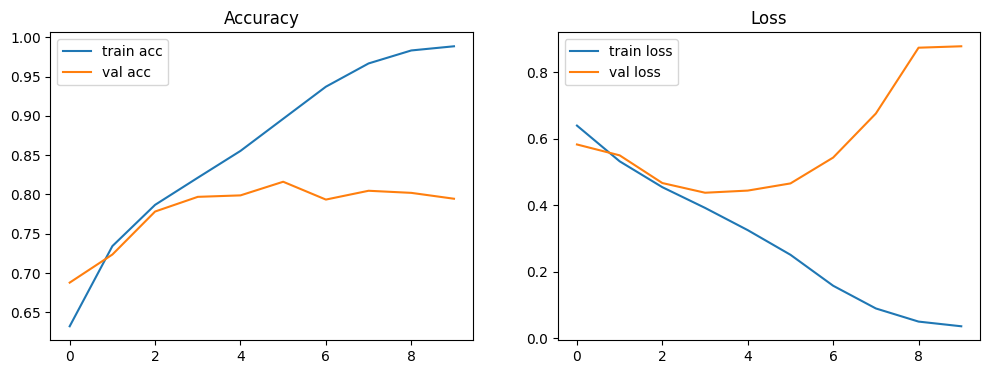

In [9]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss")

plt.show()

Now, let's see how the model performs on the test data.

In [10]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2%}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.7990 - loss: 0.9176
✅ Test Accuracy: 79.90%


Saving the model:

In [11]:
os.makedirs("../saved_models", exist_ok=True)
model.save("../saved_models/baseline_cnn.h5")